## Lab 5: Decision Tree

Tiatnic Survival Dataset

In [23]:
#Import the Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.environ["PATH"] += os.pathsep + 'C:/Users/venu/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz'

In [24]:
#Load the data sets- train and test 
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')


In [25]:
#Look at top values of train data 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
#Print the column names of train data
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
#Check the data type of each column
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
#Print the dimension of train and test data
train.shape,test.shape

((891, 12), (418, 11))

In [29]:
#Print summary statistics of train data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
#Print the number of missing values in each column of train and test data
df_train=pd.DataFrame(train)
df_train.isnull().sum()

df_test=pd.DataFrame(test)
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Visualization

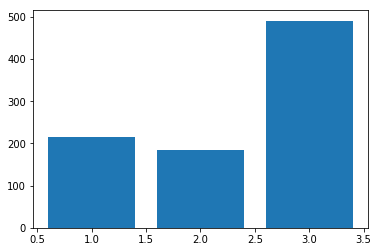

In [31]:
#Barchart of Survived, Pclass, Sex, Embarked
import matplotlib.pyplot as plt
s=train.Pclass.value_counts()
plt.bar([1,2,3],[s[1],s[2],s[3]])
plt.show()

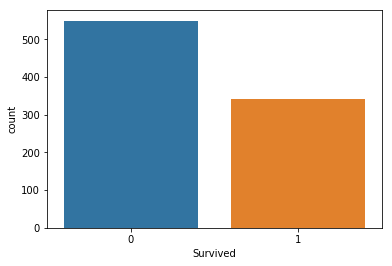

In [32]:
sns.countplot('Survived',data=train)

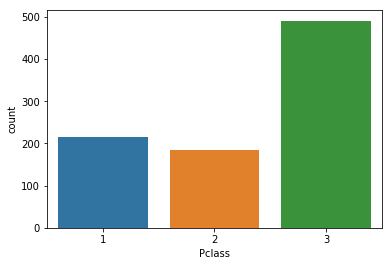

In [33]:
sns.countplot('Pclass',data=train)

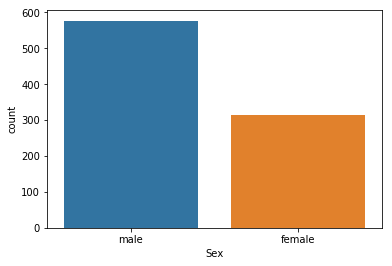

In [34]:
sns.countplot('Sex',data=train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000164F20F7CF8>,
      dtype=object)

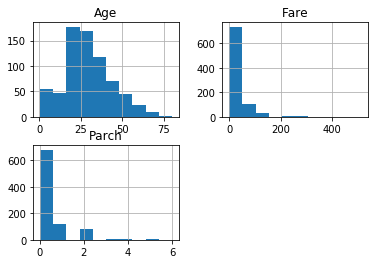

In [40]:
#Histogram of Age, Parch, Fare
#d=pd.DataFrame(train,columns=['Age','Parch','Fare'])
#d.hist()

train.hist(coZlumn=['Age','Parch','Fare'])


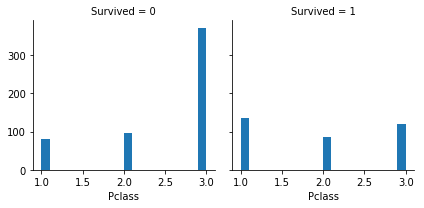

In [14]:
#Plot histogram of age for survived and did not survived class
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)


2


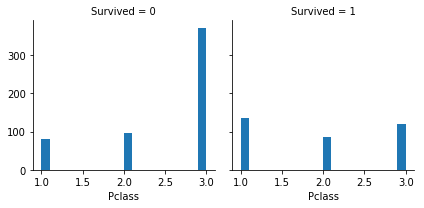

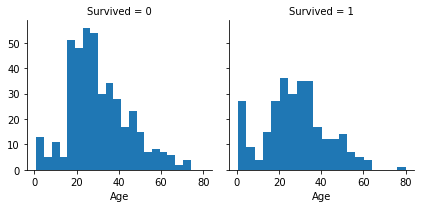

In [15]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)


f = sns.FacetGrid(train, col='Survived')
f.map(plt.hist, 'Age', bins=20)
print(train.Embarked.isnull().sum())

## Handling Missing Values

In [16]:
#Replace the msiing values in Embarked column by 'S'
train.Embarked.fillna("S",inplace=True)
print(train.Embarked.isnull().sum())

0


In [17]:
#Impute the missing values in Fare column with median value
train.Fare.isnull().sum()

0

In [18]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
import numpy as np
age_avg = train['Age'].mean()
age_std = train['Age'].std()
age_null_count = train['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

train.loc[np.isnan(train['Age']), 'Age'] = age_null_random_list
train['Age'] = train['Age'].astype(int)

## Feature Engineering - Creating new features

In [19]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
train['FamilySize']=train.Parch+train.SibSp+1
train['IsAlone']=0

In [20]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
train['IsAlone']=0
train.loc[train.FamilySize==1,'IsAlone']=1
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,1
5,6,0,3,"Moran, Mr. James",male,27,0,0,330877,8.4583,NaN,Q,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,5,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,3,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,2,0


In [21]:
#Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True
train['Has_cabin']=1
train.loc[train.Cabin.isna(),'Has_cabin']=0

In [22]:
#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
train=train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
train


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
0,0,3,male,22,1,0,7.2500,S,2,0,0
1,1,1,female,38,1,0,71.2833,C,2,0,1
2,1,3,female,26,0,0,7.9250,S,1,1,0
3,1,1,female,35,1,0,53.1000,S,2,0,1
4,0,3,male,35,0,0,8.0500,S,1,1,0
5,0,3,male,27,0,0,8.4583,Q,1,1,0
6,0,1,male,54,0,0,51.8625,S,1,1,1
7,0,3,male,2,3,1,21.0750,S,5,0,0
8,1,3,female,27,0,2,11.1333,S,3,0,0
9,1,2,female,14,1,0,30.0708,C,2,0,0


## Check the preprocessed data

In [66]:
#Print the top five elemnets
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
L=LabelEncoder()
train=train.apply(L.fit_transform)
train=pd.get_dummies(train,columns=['Embarked'])
train


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Has_cabin,Embarked_0,Embarked_1,Embarked_2
0,0,2,1,22,1,0,18,1,0,0,0,0,1
1,1,0,0,38,1,0,207,1,0,1,1,0,0
2,1,2,0,26,0,0,41,0,1,0,0,0,1
3,1,0,0,35,1,0,189,1,0,1,0,0,1
4,0,2,1,35,0,0,43,0,1,0,0,0,1
5,0,2,1,31,0,0,51,0,1,0,0,1,0
6,0,0,1,54,0,0,186,0,1,1,0,0,1
7,0,2,1,2,3,1,124,4,0,0,0,0,1
8,1,2,0,27,0,2,74,2,0,0,0,0,1
9,1,1,0,14,1,0,154,1,0,0,1,0,0


In [67]:
#Do a pairplot of all features
'''sns.set(style='ticks', color_codes='True')
sns.pairplot(train)'''

"sns.set(style='ticks', color_codes='True')\nsns.pairplot(train)"

## Model Building

In [68]:
#Prepare X and y
X=train.iloc[:,1:]
y=train.iloc[:,0]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Has_cabin,Embarked_0,Embarked_1,Embarked_2
0,2,1,22,1,0,18,1,0,0,0,0,1
1,0,0,38,1,0,207,1,0,1,1,0,0
2,2,0,26,0,0,41,0,1,0,0,0,1
3,0,0,35,1,0,189,1,0,1,0,0,1
4,2,1,35,0,0,43,0,1,0,0,0,1
5,2,1,31,0,0,51,0,1,0,0,1,0
6,0,1,54,0,0,186,0,1,1,0,0,1
7,2,1,2,3,1,124,4,0,0,0,0,1
8,2,0,27,0,2,74,2,0,0,0,0,1
9,1,0,14,1,0,154,1,0,0,1,0,0


In [69]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation

from sklearn.model_selection import train_test_split as t
X_train,X_test,Y_train,Y_test=t(X,y,test_size=0.3,random_state=10)


In [70]:
# Create the model
# Fitting the decision tree with default hyperparameters

from sklearn import tree
D= tree.DecisionTreeClassifier()
D=D.fit(X_train,Y_train)


from sklearn.metrics import accuracy_score
accuracy_score(Y_test,D.predict(X_test))



0.8134328358208955

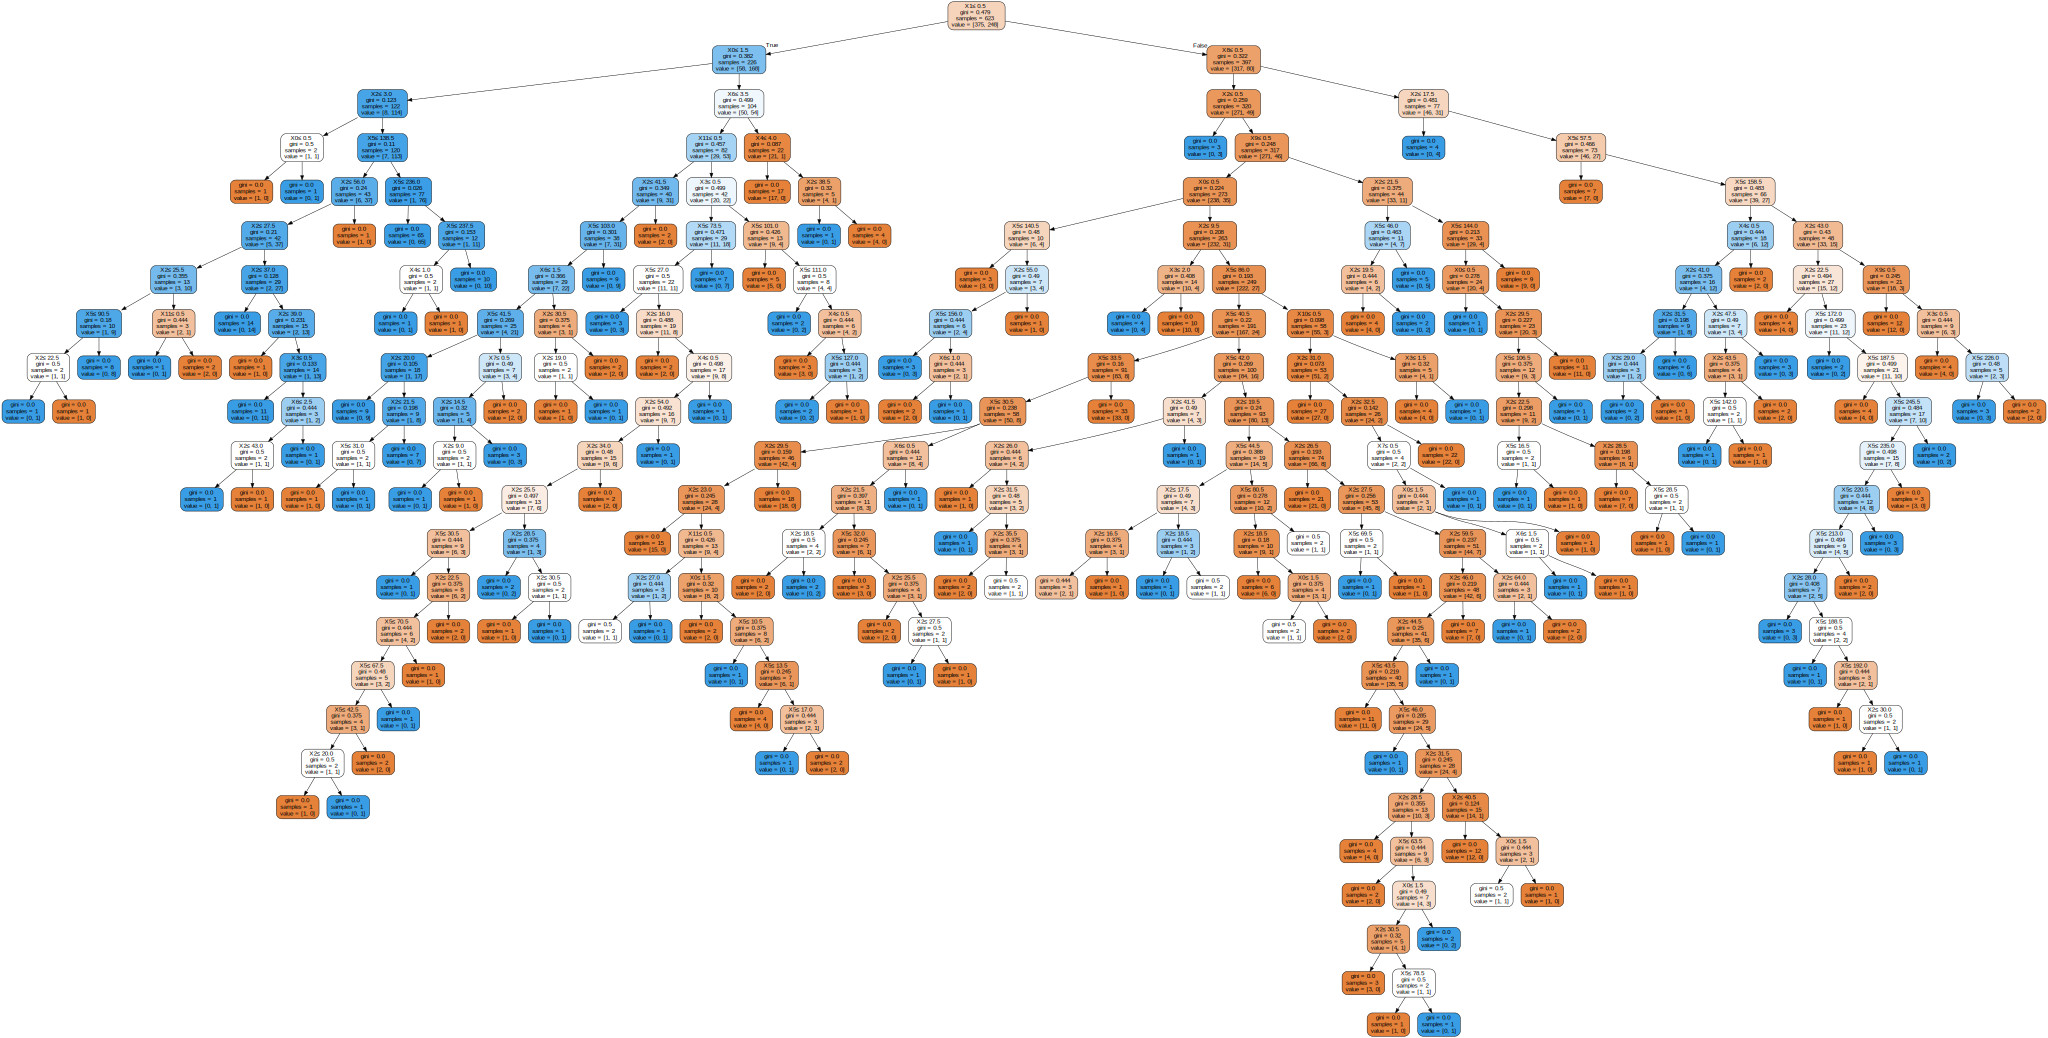

In [71]:
#Print the tree
import graphviz 

dot_data=tree.export_graphviz(D,out_file=None,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph



<img src="tree2.png">

In [72]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score
from sklearn.metrics import classification_report,confusion_matrix
classification_report(Y_test,D.predict(X_test))


'             precision    recall  f1-score   support\n\n          0       0.87      0.83      0.85       174\n          1       0.72      0.78      0.74        94\n\navg / total       0.82      0.81      0.82       268\n'

In [73]:
confusion_matrix(Y_test,D.predict(X_test))

array([[145,  29],
       [ 21,  73]], dtype=int64)

# Find a better model

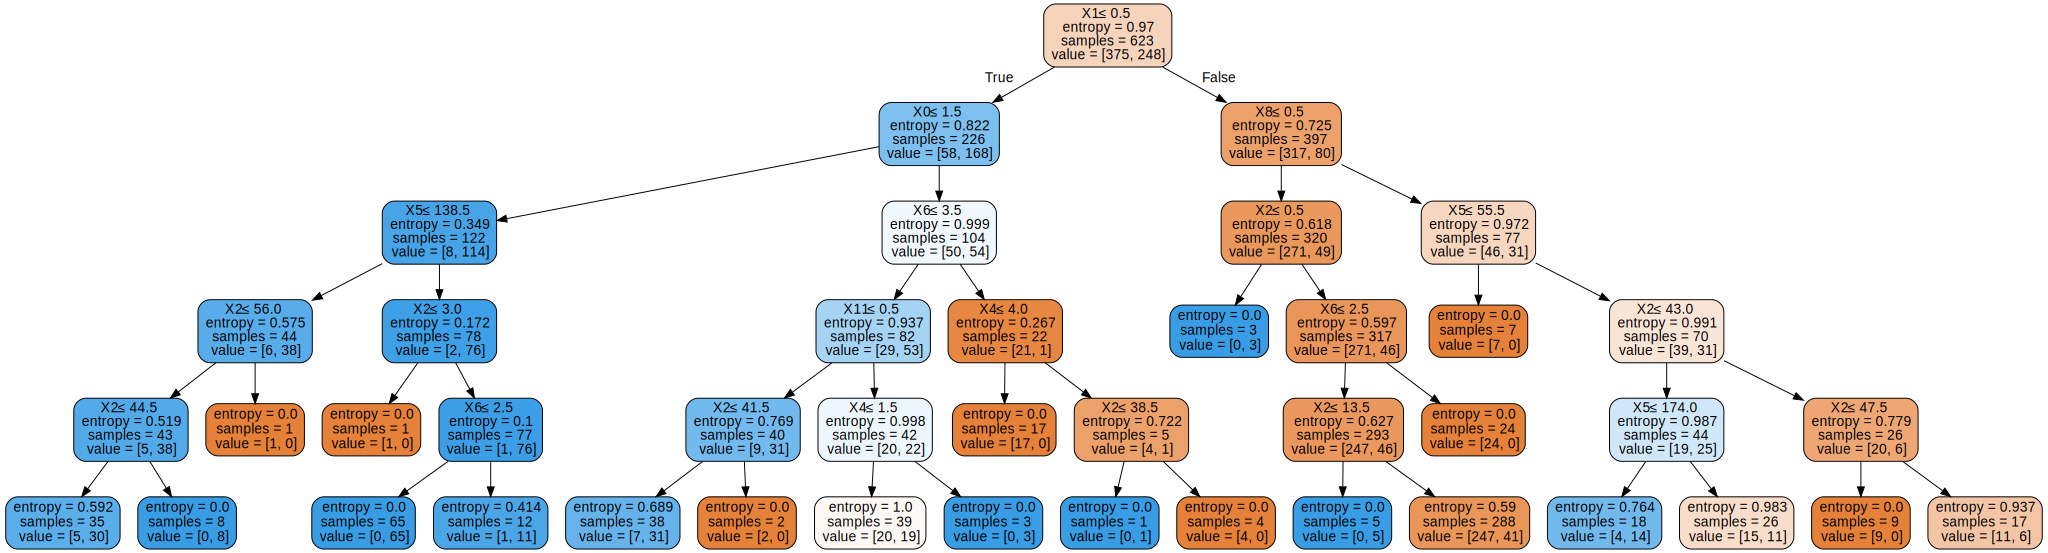

In [74]:
# GridSearchCV to find optimal max_depth

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score


D=GridSearchCV( estimator=D,param_grid = {'criterion':('gini','entropy'),'max_depth':[5,6,7,8,9],'random_state':[2,3,4,5]},scoring='f1')
D=D.fit(X_train,Y_train)
test=D.predict(X_test)
D.best_estimator_
dot_data=tree.export_graphviz(D.best_estimator_,out_file=None,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph


In [75]:
# scores of GridSearch CV
confusion_matrix(Y_test,test)

array([[159,  15],
       [ 33,  61]], dtype=int64)

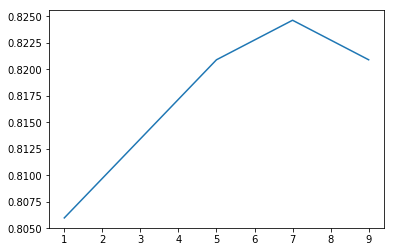

In [76]:
# plotting accuracies with max_depth
maxi=[1,3,5,7,9]
ac=[]
D.param_grid['random_state']=[1,2,3,4,5,6,7]
for i in maxi:
    D.param_grid['max_depth']=[i]
    
    D =D.fit(X_train,Y_train)
    D.best_estimator_
    ac.append(accuracy_score(Y_test,D.predict(X_test)))
ac

plt.plot(maxi,ac)
plt.show()
D.param_grid['max_depth']=maxi

In [77]:
# GridSearchCV to find optimal min_sample_leaf

D.param_grid['min_samples_split']=np.arange(20,40)
D=D.fit(X_train,Y_train)
test=D.predict(X_test)
accuracy_score(Y_test,test),D.best_estimator_

(0.8134328358208955,
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=20,
             min_weight_fraction_leaf=0.0, presort=False, random_state=2,
             splitter='best'))

In [78]:
# scores of GridSearch CV
confusion_matrix(Y_test,test)

array([[154,  20],
       [ 30,  64]], dtype=int64)

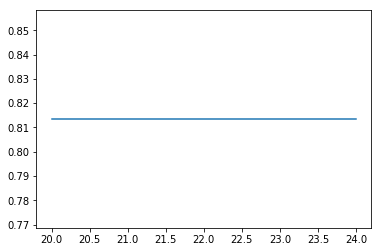

In [79]:
# plotting accuracies with min_samples_leaf
bc=[]
for i in np.arange(20,25):
    D.param_grid['min_samples_split']=[i]
    D =D.fit(X_train,Y_train)
    bc.append(accuracy_score(Y_test,D.predict(X_test)))
bc

plt.plot(np.arange(20,25),bc)

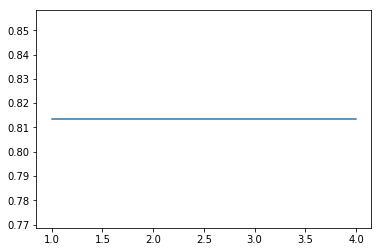

In [80]:
D.param_grid['min_samples_split']=np.arange(20,25)
cc=[]
for i in np.arange(1,5):
    D.param_grid['min_samples_leaf']=[i]
    D=D.fit(X_train,Y_train)
    cc.append(accuracy_score(Y_test,D.predict(X_test)))
plt.plot(np.arange(1,5),cc)


In [81]:
# Create a model with optimal hyperparameters - max_depth, min_samples_leaf, min_samples_split
D.param_grid['min_samples_leaf']=[1,2,3,4,5]
D.fit(X_train,Y_train)
D.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')

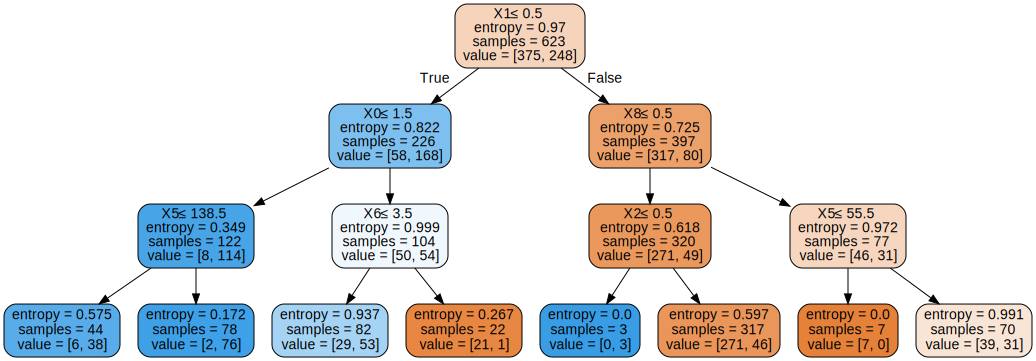

In [82]:
#Print the otimal Model

import graphviz 

dot_data=tree.export_graphviz(D.best_estimator_,out_file=None,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph


<img src="tree3.png">

In [83]:
# Let's check the evaluation metrics of our optimal model


In [84]:
#Test the perfromance of the optimal model on Test Data


## End